In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from laspy.file import File
import matplotlib.pyplot as plt

import sys

sys.path.insert(0,'..') # So we can import point_density_functions from parent directory
from point_density_functions import *
%load_ext autoreload
%matplotlib notebook

In [2]:
def pull_first_scan_gap(df):
    # Separate return num, only keep the first returns, add scan_gap, sort
    df['num_returns'] = np.floor(df['flag_byte']/16).astype(int)
    df['return_num'] = df['flag_byte']%16
    
    first_return_wall = df[df['return_num']==1]
    first_return_wall.sort_values(by=['gps_time'],inplace=True)
    first_return_wall.reset_index(inplace=True)
    first_return_wall.loc[1:,'scan_gap'] = [first_return_wall.loc[i+1,'scan_angle'] - first_return_wall.loc[i,'scan_angle'] for i in range(first_return_wall.shape[0]-1)]
    first_return_wall.loc[0,'scan_gap'] = 0
    first_return_wall['scan_angle_deg'] = first_return_wall['scan_angle']*.006
    return first_return_wall

In [3]:
flight_id = '180819'
las_points = pd.read_hdf("../../Data/parking_lot/las_points_180819.lz")
df_first = pull_first_scan_gap(las_points)

/home/michael/python-virtual-environments/data/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/michael/python-virtual-environments/data/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/michael/python-virtual-environments/data/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [4]:
# Scan gap of -4,-5,-6 is normal, -10,-11,-15 are a missed point
w_df = pd.DataFrame(df_first['scan_gap'].value_counts())
w_df.head(20)

,scan_gap
-5.0,8151737
-6.0,2356776
-4.0,332185
-10.0,157040
-11.0,74622
-16.0,28710
-15.0,22951
-21.0,20228
-26.0,15164
-31.0,10708


In [5]:
def missing_pct(df_first):
    # Prints out the ratio of scan_angle_gap at 2x or 3x the expected to the number of expected
    w = dict(df_first['scan_gap'].value_counts())
    normal = np.sum([w[i] for i in [-4,-5,-6]])
    missing = np.sum([w[i] for i in [-10,-11,-16,-15]])
    print("Miss Pct: {:2.4f}".format(missing/normal))
missing_pct(df_first)

Miss Pct: 0.0261


In [6]:
# Avg Scan angle for missing pts vs regular
after_single_miss = df_first[df_first['scan_gap'].isin([-10,-11])]
after_multiple_miss = df_first[df_first['scan_gap'].isin([-21,-20,-15,-16])]

print("Overall avg scan angle:\t\t\t {:2.4f}".format(df_first['intensity'].mean()))
print("Missing point avg scan angle:\t\t {:2.4f}".format(after_single_miss['intensity'].mean()))
print("Missing multiple pts avg scan angle: \t {:2.4f}".format(after_multiple_miss['intensity'].mean()))
print("Before miss pt scan angle:\t\t {:2.4f}".format(df_first.loc[after_single_miss.index-1]['intensity'].mean()))

Overall avg scan angle:			 1579.2963
Missing point avg scan angle:		 1277.7688
Missing multiple pts avg scan angle: 	 978.4873
Before miss pt scan angle:		 1286.4247


In [7]:
def plot_missing_pts(df_first,col,ylabel='Point Count'):
    # Prints the histogram of col for each of: all points, after single miss pts, and after multiple miss pts
    # Avg Scan angle for missing pts vs regular
    after_single_miss = df_first[df_first['scan_gap'].isin([-10,-11])]
    after_multiple_miss = df_first[df_first['scan_gap'].isin([-21,-20,-15,-16])]
    
    
    plt.figure(figsize=[20,5])

    plt.subplot(1,3,1)
    ax = df_first[col].hist(bins=100)
    ax.set_xlabel(col)
    ax.set_ylabel(ylabel)
    ax.set_title("All points")

    plt.subplot(1,3,2)
    ax = after_single_miss[col].hist(bins=100)
    ax.set_xlabel(col)
    ax.set_title("Single Missing Point")

    plt.subplot(1,3,3)
    ax = after_multiple_miss[col].hist(bins=100)
    ax.set_xlabel(col)
    ax.set_title("Multiple Missing Points")

In [ ]:
plot_missing_pts(df_first,'scan_angle_deg','Flight 181004')
plot_missing_pts(df_first,'intensity')

In [8]:
horiz = pd.read_pickle("../../Data/parking_lot/rectangle_points_laefer.pkl")
vert = pd.read_pickle("../../Data/parking_lot/wall_points_laefer.pkl")
horiz_first = pull_first_scan_gap(horiz[horiz['flight_id']==flight_id])
vert_first = pull_first_scan_gap(vert[vert['flight_id']==flight_id])

/home/michael/python-virtual-environments/data/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/michael/python-virtual-environments/data/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/michael/python-virtual-environments/data/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

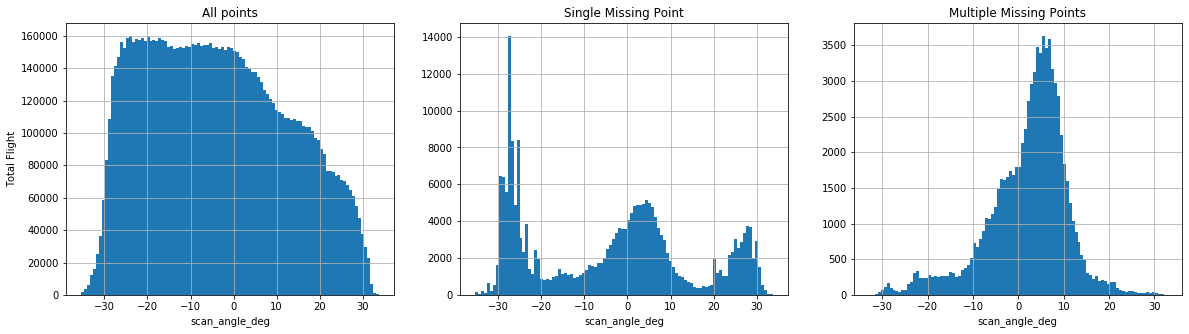

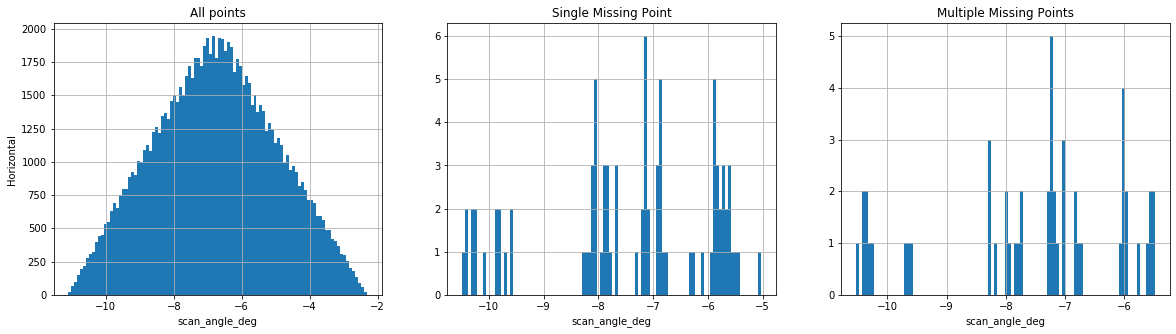

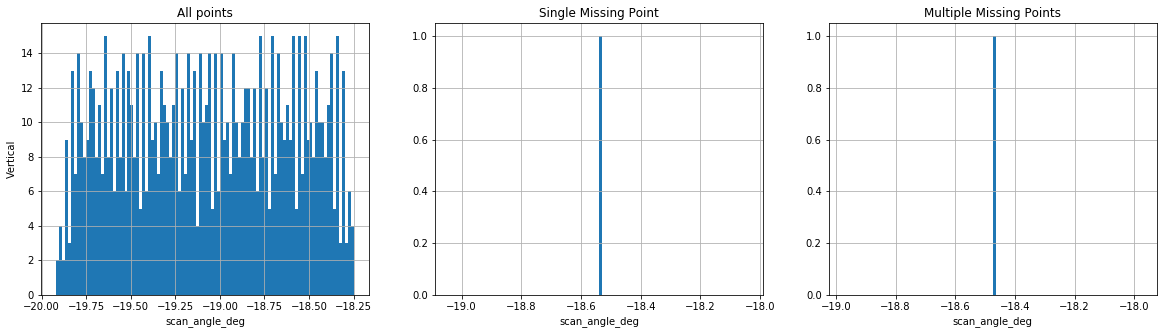

In [9]:
plot_missing_pts(df_first,'scan_angle_deg','Total Flight')
plot_missing_pts(horiz_first,'scan_angle_deg','Horizontal')
plot_missing_pts(vert_first,'scan_angle_deg','Vertical')

In [18]:
mid_scan = df_first[df_first['scan_angle_deg']<-16]
w_df = pd.DataFrame(mid_scan['scan_gap'].value_counts())
w_df.head(20)

,scan_gap
-5.0,2303162
-6.0,668172
-4.0,93417
-10.0,58553
-11.0,20675
-26.0,1331
-16.0,1246
-31.0,1174
-21.0,1169
-15.0,1083


In [ ]:
plot_missing_pts(df_first,'intensity','Total Flight')
plot_missing_pts(horiz_first,'intensity','Horizontal')
plot_missing_pts(vert_first,'intensity','Vertical')

In [ ]:
plot_missing_pts(df_first,'x_scaled','Total Flight')

In [ ]:
plot_missing_pts(df_first,'y_scaled','Total Flight')

In [ ]:
# vv = pull_first_scan_gap(vert)
vv[vv['scan_gap'].isin([-10,-11])]['flight_id'].value_counts()

In [ ]:
hh = pull_first_scan_gap(horiz)
hh[hh['scan_gap'].isin([-10,-11])]['flight_id'].value_counts()

In [19]:
regular = w_df.loc[-5]+w_df.loc[-6]+w_df.loc[-4]
one_miss = w_df.loc[-10]+w_df.loc[-11]+w_df.loc[-9]
multiple_miss = w_df.loc[-15]+w_df.loc[-16]+w_df.loc[-20]+w_df.loc[-21]+w_df.loc[-26]+w_df.loc[-31]+w_df.loc[-36]

In [20]:
print(regular['scan_gap'])
print(one_miss['scan_gap'])
print(multiple_miss['scan_gap'])
print("multiple / one: {:2.4f}".format(multiple_miss['scan_gap']/one_miss['scan_gap']))

3064751
79812
6682
multiple / one: 0.0837


In [12]:
w_df.head(20)

,scan_gap
-5.0,8151737
-6.0,2356776
-4.0,332185
-10.0,157040
-11.0,74622
-16.0,28710
-15.0,22951
-21.0,20228
-26.0,15164
-31.0,10708
